# Telco Churn Classification Project

## An Overview
Telco's long-term success weighs upon its customer base. Continuous revenue necessitates the minimization of customers terminating our services. Churn can be triggered by many different factors such as highly incentivized packages from competitors, negative service experiences and change of individual needs are among these. As your faithful data scientist, I will retrieve, assess, and draw conclusions that are not easily detected without the inference provided by machine learning's novel insights. 

## Project Goal
By utilizing some of Python's essential tools for working with data, I will elucidate critical issues and weaknesses. This way,Telco can effectively target potential losses, gaining initiative and resourcefulness beforehand by addressing problem areas as identified by a predictive model.

# The First Stage: Data Acquisition
##### First we tap into Codeup's MySQL database and join all the necessary foreign keys so that all information relevant to this scenario is readily available for analysis.
The tables used, to this end: customers, contract_types, internet_services_types, and payment_types.
The innerworkings of this retrieval are imported from a personalized acquire model. We will now import that among all the other modules relevant to this project. These include Numpy and Pandaz for datawrangling and processing, alongside Matplotlib and Seaborn for the sake of visualization.

In [1]:
# The usual modular suspects
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import math

# Of Mice & Machine Learning Mavericks
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay, mutual_info_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.dummy import DummyClassifier


import env
import os
from acquire import get_telco_data
from prepare import prep_telco_data
from explore import describe_data, plot_target_dist, plot_internet_services, plot_services, plot_services_churn
from explore import plot_contracts, plot_pay_methods
from preprocessing import central_limit_theorem_test, two_sample_ttest, equal_var_test, chi2_test, evaluate_hypothesis
from model import model_metrics, baseline_model, model_more

import warnings
warnings.filterwarnings('ignore')

In [2]:
# run the user-defined function (UDF) get_telco_data IOT create a customer-based dataframe
df = get_telco_data()

Using cached csv


# Stage Two: Data Preparation
After acquisition, several steps are carried out to prepare and sanitize it. This step is essential for gaining an understanding of the data's structure. Here we also conduct initial preprocessing, identify patterns and inconsistencies in the data (i.e. missing values) and build and establish some assumptions before getting into the more rigorous ends of hypotheses formulation. 

As such, I've developed a UDF called describe_data that gives me information such as summary statistics, the number of missing values, and relative frequencies among unique values in columns. To this end, I discovered that each new customer with a tenure of zero had white space in their total_charges column, and controlled for this, among other factors via another UDF called prep_telco_data, which can be found in the prepare.py file in my repository. 

In [4]:
describe_data(df)

The first three rows are: 
----------------------------------------------------------
   payment_type_id  internet_service_type_id  contract_type_id customer_id  \
0                2                         1                 2  0002-ORFBO   
1                2                         1                 1  0003-MKNFE   
2                1                         2                 1  0004-TLHLJ   

   gender  senior_citizen partner dependents  tenure phone_service  ...  \
0  Female               0     Yes        Yes       9           Yes  ...   
1    Male               0      No         No       9           Yes  ...   
2    Male               0      No         No       4           Yes  ...   

  tech_support streaming_tv streaming_movies paperless_billing  \
0          Yes          Yes               No               Yes   
1           No           No              Yes                No   
2           No           No               No               Yes   

  monthly_charges total_charges chu

In [3]:
train, test, validate = prep_telco_data(df)

Notice here how instead of seeing the variable named df, as it was before, it has now been split into three distinct samples. The target of which is, of course, churn, as it is the dependent feature for this project.

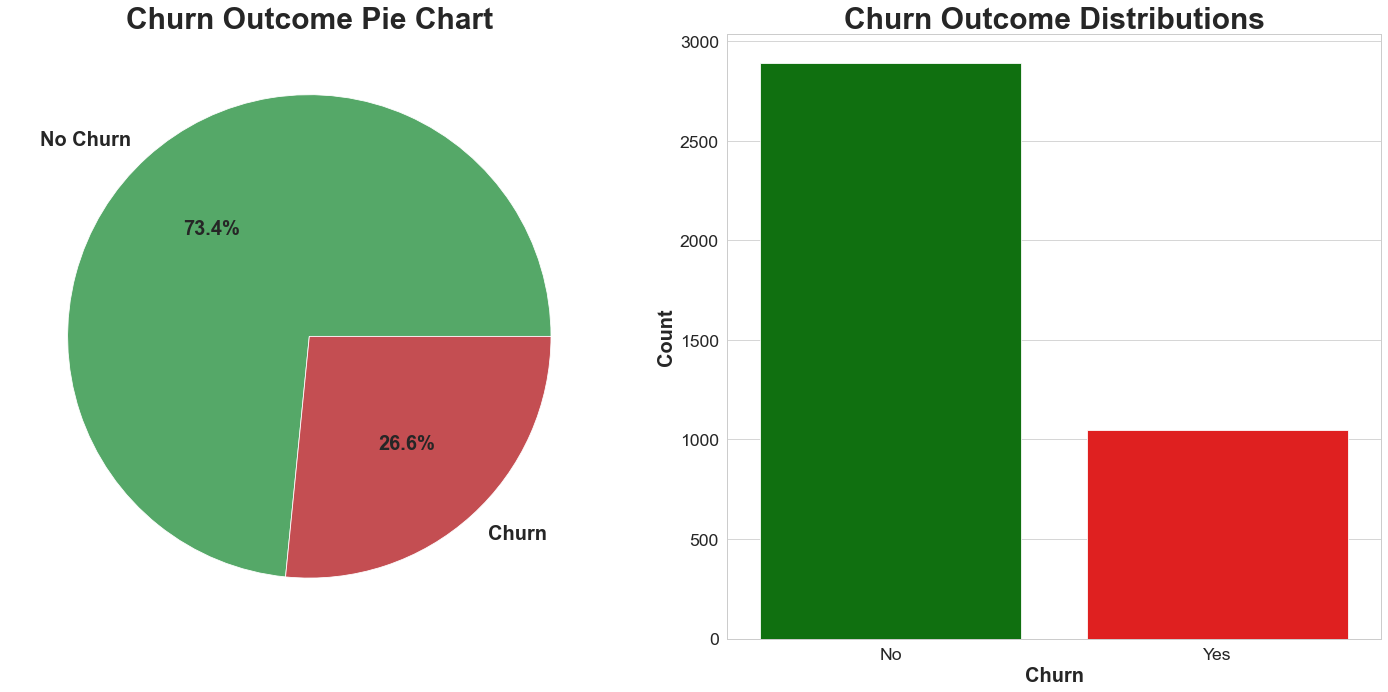

In [5]:
plot_target_dist(train)

# Stage Three: Exploratory Analysis

At this juncture, via visualization we discover which features will have the largest impact on our target variable, churn. Once these are assumed, they are submitted to rigorous statistical tests. 

### Hypothesis Building
- Looking at the features included in data and connecting them to their potential influence on customer churn, the following hypotheses can be made:
  - The longer the contract duration the less likely it is that the customer will churn as he/she is less frequently confronted with the termination/prolongation decision and potentially values contracts with reduced effort.
  - Customers are willing to cancel simple contracts with few associated product components quicker and more often than complexer product bundles — for bundles customers value the reduced administrative complexity. They might also be hesitant to cancel a contract, when they depend on the additional service components (e.g. security packages).
  - Electronic checks are essentially proportional to the other payment methods and yet are inordinately more likely to churn. This may be consequential of the payment process being more difficult than first assumed. 

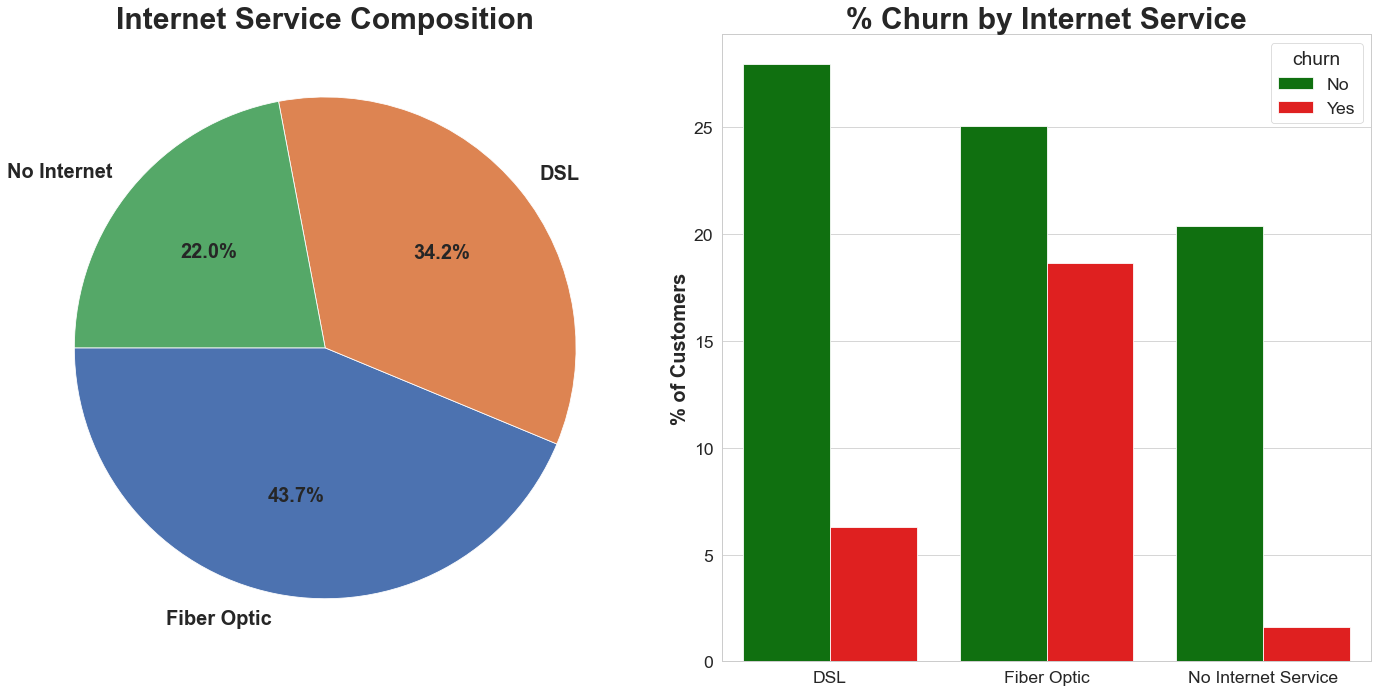

In [6]:
plot_internet_services(train)

In [8]:
chi2_test(train.churn, train.internet_service_type)

Observed

[[1101  987  803]
 [ 247  735   64]]
---
Expected

[[ 989.9 1264.5  636.7]
 [ 358.1  457.5  230.3]]
---

chi^2 = 439.7661
p     = 0.0000

Reject H0


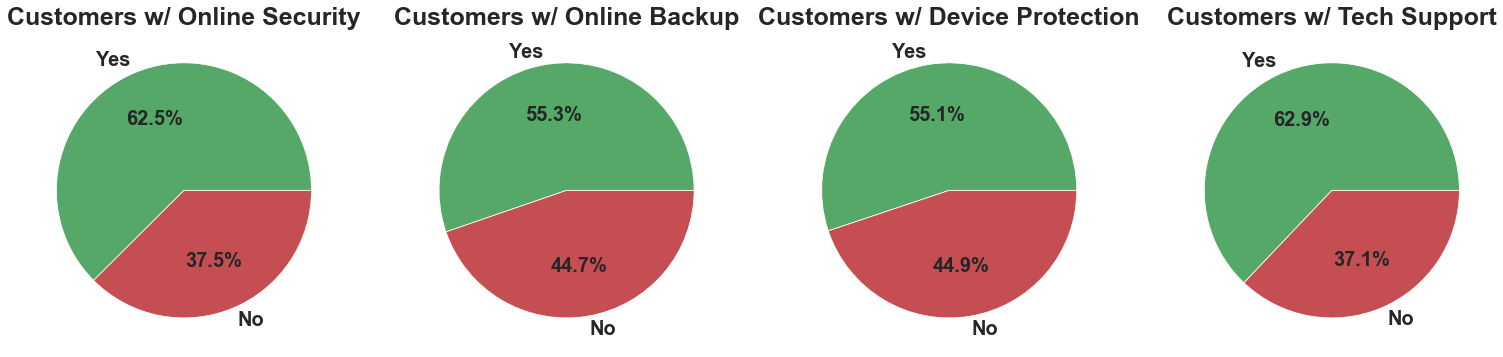

In [13]:
plot_services(train)

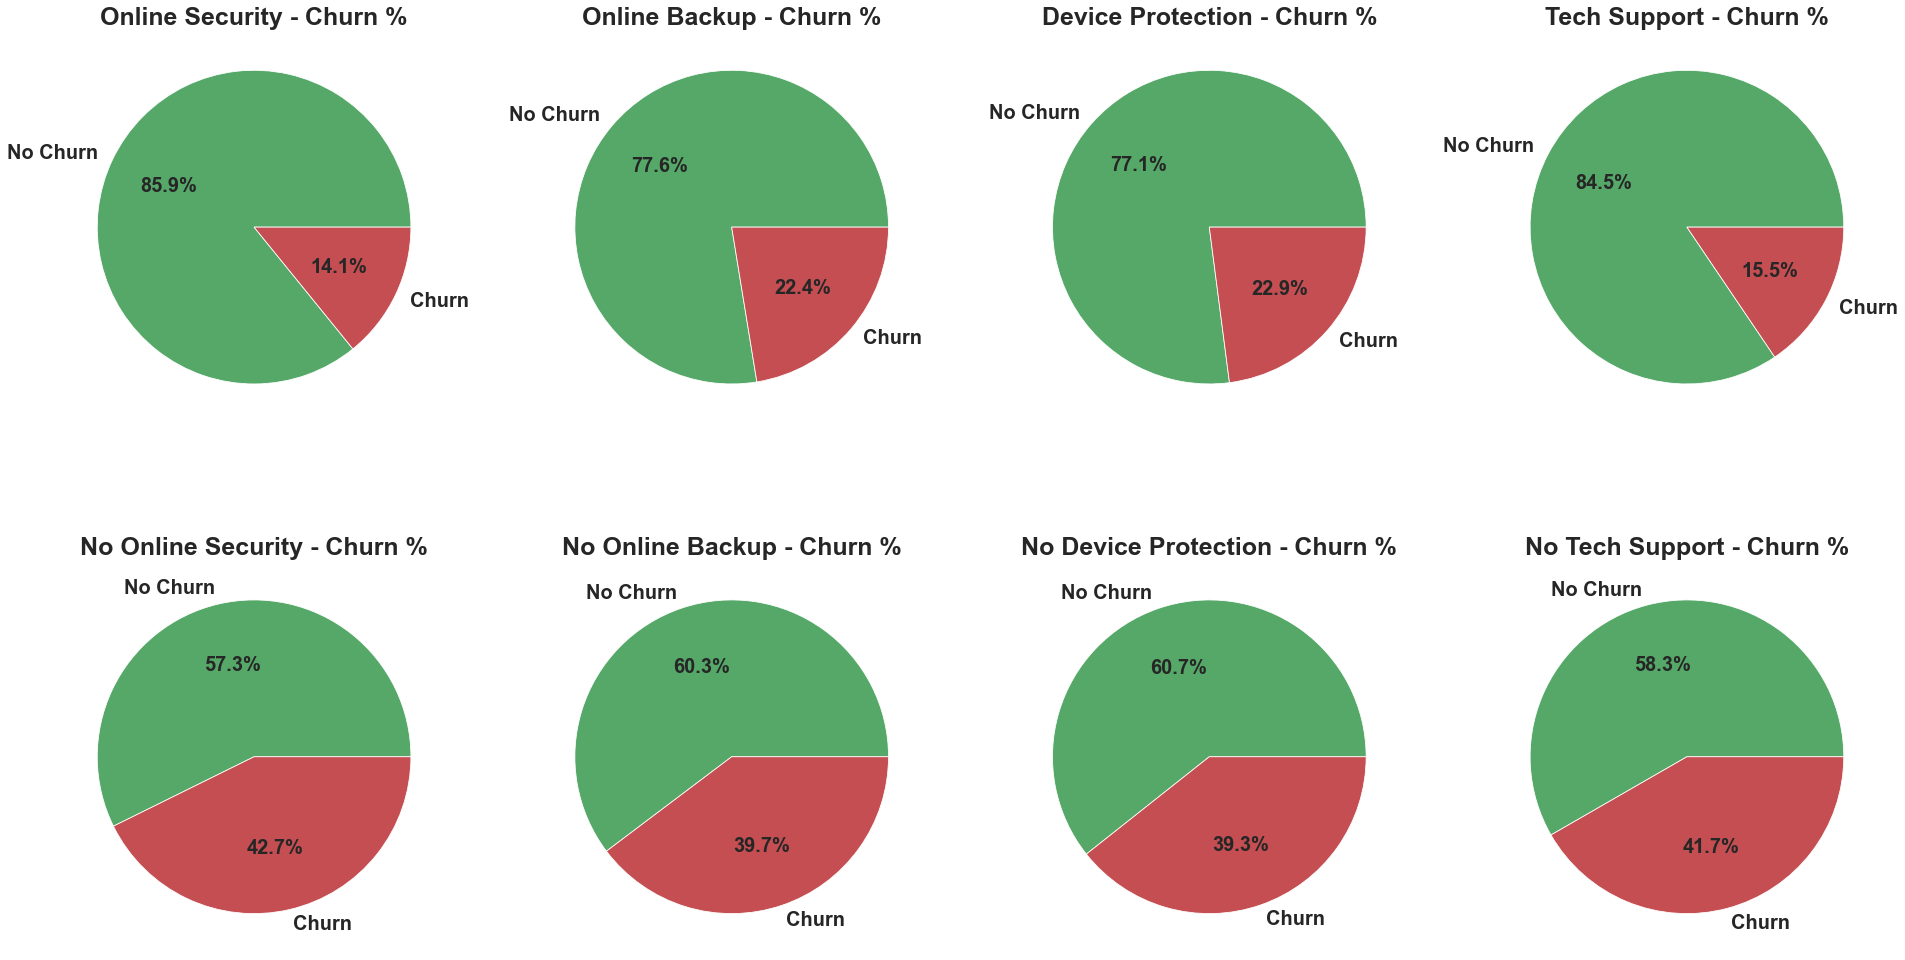

In [14]:
plot_services_churn(train)

In [10]:
chi2_test(train.churn, train.online_security)

Observed

[[1099  803  989]
 [ 819   64  163]]
---
Expected

[[1408.4  636.7  845.9]
 [ 509.6  230.3  306.1]]
---

chi^2 = 510.5206
p     = 0.0000

Reject H0


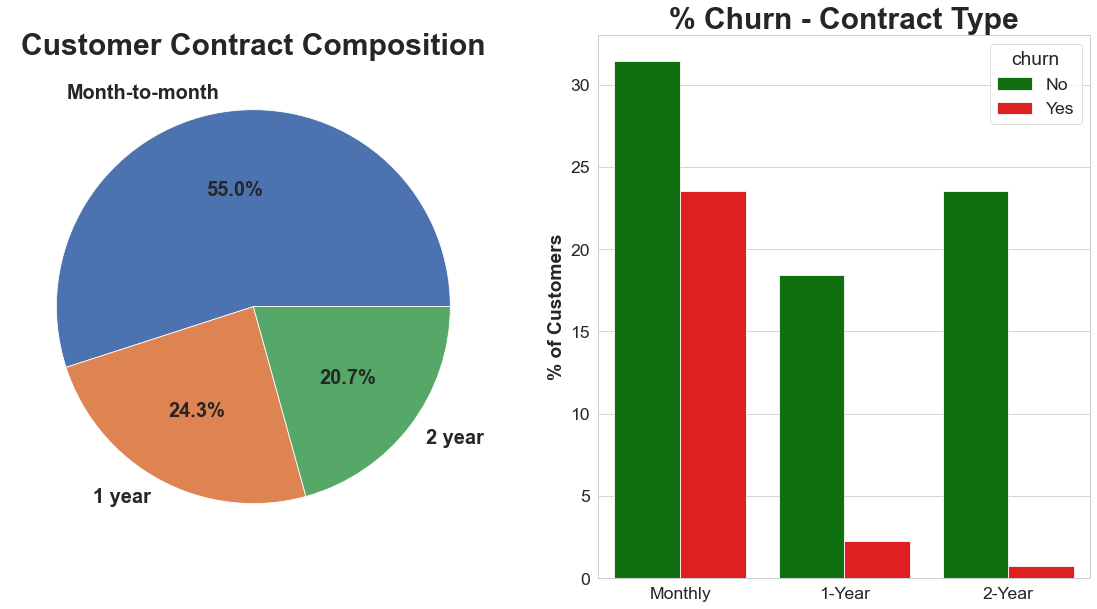

In [15]:
plot_contracts(train)

In [11]:
chi2_test(train.churn, train.contract_type)

Observed

[[1238  726  927]
 [ 927   89   30]]
---
Expected

[[1589.8  598.5  702.7]
 [ 575.2  216.5  254.3]]
---

chi^2 = 664.6572
p     = 0.0000

Reject H0


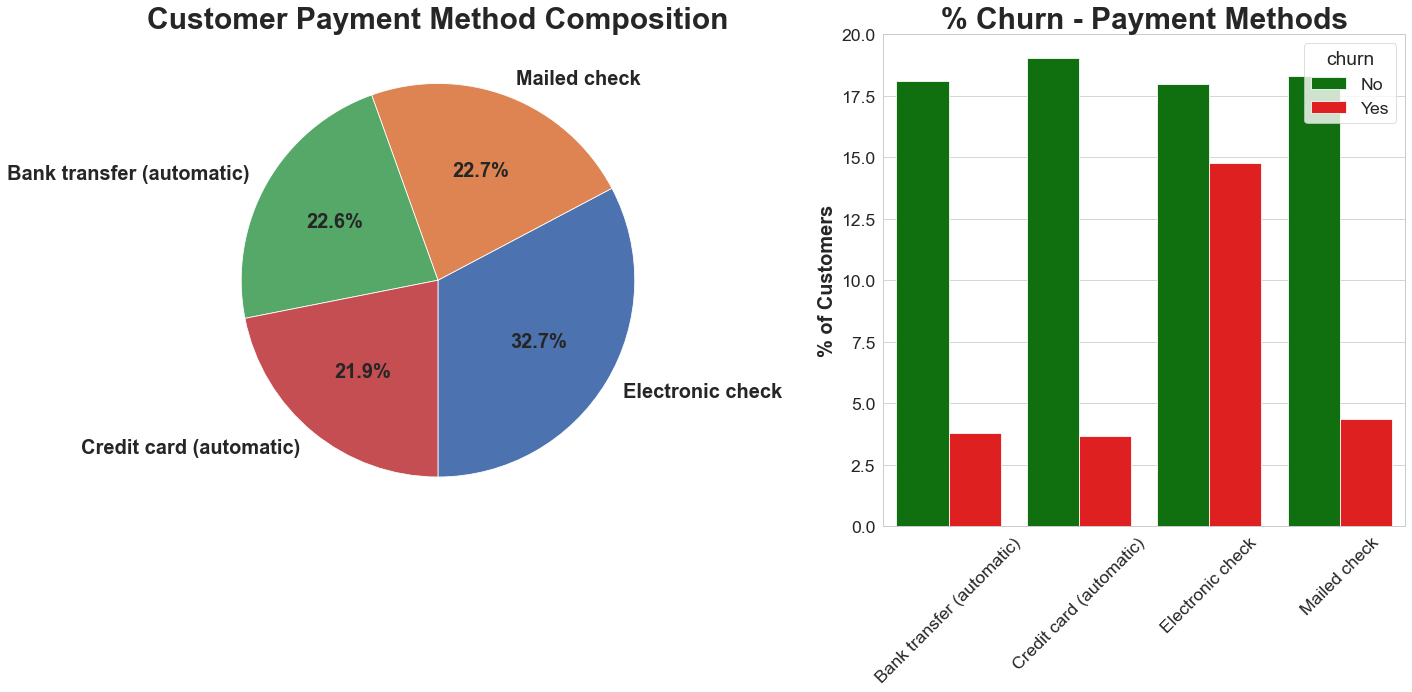

In [16]:
plot_pay_methods(train)

In [12]:
chi2_test(train.churn, train.payment_type)

Observed

[[713 750 708 720]
 [149 145 581 171]]
---
Expected

[[633.  657.2 946.5 654.3]
 [229.  237.8 342.5 236.7]]
---

chi^2 = 338.4852
p     = 0.0000

Reject H0


## Stage Four: Modeling

In [19]:
features = [
    'monthly', 'two_year_contract', 'fiber_optic', 'electronic_check',
    'enc_tenure_months_1-6', 'enc_tenure_months_7-12', 'enc_tenure_months_13-18',
    'auto_credit_card', 'auto_bank_transfer', 'no_internet',
    'online_security_No', 'online_security_Yes', 'online_backup_No', 'online_backup_Yes',
    'device_protection_No', 'device_protection_Yes', 'tech_support_No', 'tech_support_Yes'   
]

X_train, y_train = train[features], train.churn_encoded
X_validate, y_validate = validate[features], validate.churn_encoded

In [20]:
baseline, baseline_pred = baseline_model(X_train, y_train)


               Baseline Accuracy Score: 73.43%
        First Ten Baseline Predictions: [0 0 0 0 0 0 0 0 0 0]
        


In [21]:
# Decision Tree
model_1 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 6, min_samples_leaf = 1, min_samples_split = 30)
model_1.fit(X_train, y_train) 

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_split=30)

In [22]:
#training and validate score, I want them to be better than the baseline and close to each other so I'm not overfitting
print(f'training score: {model_1.score(X_train, y_train):.2%}')
print(f'validate score: {model_1.score(X_validate, y_validate):.2%}')

training score: 80.62%
validate score: 79.39%


In [31]:
y_pred_model_1 = y_pred = model_1.predict(X_train)

In [38]:
print(f'{model_metrics(X_train, y_train, y_pred)}')
print(f'accuracy score is {round(accuracy_score(y_train, y_pred),2)}')

Number of true negatives  (tn) = 2571 
 The True Negative Rate (tnr) is: 0.889 

Number of true positives  (tp) = 603 
 The True Positive Rate (tpr) is:  0.576 

Number of false negatives (fn) = 443 
 The False Negative Rate (tpr) is: 0.424 

Number of false positives (fp) = 320 
 The False Positive Rate (tpr) is: 0.111 


    The True Positive Rate is 0.576, The False Positive Rate is 0.111,
    The True Negative Rate is 0.889, and the False Negative Rate is 0.424
    
 The precision is: 65.33%
 The recall rate is: 57.65%
 The F1 score is: 61.25%
              precision    recall  f1-score      support
0              0.853019  0.889312  0.870787  2891.000000
1              0.653304  0.576482  0.612494  1046.000000
accuracy       0.806198  0.806198  0.806198     0.806198
macro avg      0.753162  0.732897  0.741641  3937.000000
weighted avg   0.799958  0.806198  0.802163  3937.000000
accuracy score is 0.81


In [53]:
# Random Forest
model_2 = RandomForestClassifier(max_depth = 5, random_state = 123)
model_2.fit(X_train, y_train)

y_pred_model_2 = model_2.predict(X_train)
pd.Series(y_pred_model_2).value_counts()

0    3207
1     730
dtype: int64

In [54]:
#training and validate score, I want them to be better than the baseline and close to each other so I'm not overfitting
print(f'training score: {model_2.score(X_train, y_train):.2%}')
print(f'validate score: {model_2.score(X_validate, y_validate):.2%}')

training score: 80.04%
validate score: 79.89%


In [55]:
print(f'{model_metrics(X_train, y_train, y_pred)}')
print(f'accuracy score is {round(accuracy_score(y_train, y_pred),2)}')

Number of true negatives  (tn) = 2571 
 The True Negative Rate (tnr) is: 0.889 

Number of true positives  (tp) = 603 
 The True Positive Rate (tpr) is:  0.576 

Number of false negatives (fn) = 443 
 The False Negative Rate (tpr) is: 0.424 

Number of false positives (fp) = 320 
 The False Positive Rate (tpr) is: 0.111 


    The True Positive Rate is 0.576, The False Positive Rate is 0.111,
    The True Negative Rate is 0.889, and the False Negative Rate is 0.424
    
 The precision is: 65.33%
 The recall rate is: 57.65%
 The F1 score is: 61.25%
              precision    recall  f1-score      support
0              0.853019  0.889312  0.870787  2891.000000
1              0.653304  0.576482  0.612494  1046.000000
accuracy       0.806198  0.806198  0.806198     0.806198
macro avg      0.753162  0.732897  0.741641  3937.000000
weighted avg   0.799958  0.806198  0.802163  3937.000000
accuracy score is 0.81


In [56]:
# K-Nearest Neighbors
model_3 = KNeighborsClassifier(n_neighbors = 7, weights = 'uniform')
model_3.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [57]:
y_pred_model_3 = model_3.predict(X_train)
pd.Series(y_pred_model_3).value_counts()

0    3066
1     871
dtype: int64

In [58]:
y_val_pred = model_3.predict(X_validate)

In [59]:
accuracy_score(y_validate, y_val_pred)

0.7803837953091685

In [60]:
print(f'{model_metrics(X_train, y_train, y_pred)}')
print(f'accuracy score is {round(accuracy_score(y_train, y_pred),2)}')

Number of true negatives  (tn) = 2571 
 The True Negative Rate (tnr) is: 0.889 

Number of true positives  (tp) = 603 
 The True Positive Rate (tpr) is:  0.576 

Number of false negatives (fn) = 443 
 The False Negative Rate (tpr) is: 0.424 

Number of false positives (fp) = 320 
 The False Positive Rate (tpr) is: 0.111 


    The True Positive Rate is 0.576, The False Positive Rate is 0.111,
    The True Negative Rate is 0.889, and the False Negative Rate is 0.424
    
 The precision is: 65.33%
 The recall rate is: 57.65%
 The F1 score is: 61.25%
              precision    recall  f1-score      support
0              0.853019  0.889312  0.870787  2891.000000
1              0.653304  0.576482  0.612494  1046.000000
accuracy       0.806198  0.806198  0.806198     0.806198
macro avg      0.753162  0.732897  0.741641  3937.000000
weighted avg   0.799958  0.806198  0.802163  3937.000000
accuracy score is 0.81


In [ ]:
# Final Test

# re-creating the model using the given features and hyperparameters

# separate each sample into x (features) and y (target)
x_train = train[features]
y_train = train[target]

x_test = test[features]
y_test = test[target]

# create the classifier

# a random forest classifier with the given max-depth and min-samples-leaf values
# establish a random state for produceability
clf = RandomForestClassifier(max_depth=9, 
                             min_samples_leaf=7, 
                             random_state=42)

# fit the classifier to the training data
clf = clf.fit(x_train, y_train)

# create predictions for the model's performance on the test set
y_pred = clf.predict(x_test)

# establish the probability for those predictions created above
y_pred_proba = clf.predict_proba(x_test)[:,1]

print('model accuracy: ', sk.metrics.accuracy_score(y_test, y_pred))

In [ ]:
# exporting the predictions and prediction probabilities for test sample into a .csv for delivery

# create a dataframe with the appropriate columns
predictions = pd.DataFrame(columns=['customer_id', 'churn_probability', 'churn_prediction'])
# set customer id using the customer_id column from the original database
predictions['customer_id'] = test.customer_id
# set the churn_probability column using the probabilities created above
predictions['churn_probability'] = y_pred_proba
# set the predictions column using the predictions created above
predictions['churn_prediction'] = y_pred
# write to a local csv file
predictions.to_csv('predictions.csv')